In [2]:
%pylab inline
import seaborn as sns
import numpy as np
import xarray as xr
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
#import cmocean as cm
import scipy.interpolate.ndgriddata as ndgriddata
from scipy.interpolate import griddata

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Generic plotting
rcParams['savefig.dpi'] = 300
rcParams['figure.figsize'] = [13, 7]
rcParams['figure.dpi'] = 300
rcParams['font.size'] = 12
rcParams['font.family'] = 'Arial'
sns.set_style("white")

# Load OBS

In [4]:
import scipy.io
mat = scipy.io.loadmat('MonthlyClimatology_ARGO_MLDbmax_TEOS10_Copernicus_PF_2000-2017_all_jun252019.mat')
mld_o_m = mat['OBSMLDm']
mld_o = mat['OBSMLDg']
lon_o = mat['X']
lat_o = mat['Y']

# Load Model

In [5]:
pathx1 = '/mnt/lustre/groups/erth0834/SARAH/DWHITT/'
xmc = xr.open_mfdataset(pathx1 + 'XMXL-monmean_CTRL.nc', decode_times=False)
xmlp = xr.open_mfdataset(pathx1 + 'XMXL-monmean_LP.nc', decode_times=False)
lon = xmc.TLONG.values
lat = xmc.TLAT.values
mld = xmc.XMXL.values/1e2
mld_lp = xmlp.XMXL.values/1e2

# DIFFERENCE AND ANNUAL MEAN DIFF:

In [6]:
mld_diff = mld - mld_lp
mld_diff_mean = np.nanmean(mld_diff,axis=0)
mld_max=np.nanmax(mld,axis=0)
mld_mean=np.nanmean(mld,axis=0)

/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: All-NaN slice encountered
  app.launch_new_instance()
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice


# FIND MASKS OF LARGEST MEAN DIFF

In [7]:
# 3: FIND MASK BASED ON 93 percentile on the mean:
#---------------------------
mld_diff_mask = np.ma.masked_less_equal(mld_mean, np.nanpercentile(mld_mean ,93))


# FIND REGIONAL MASKS

In [8]:
# 5. Mask regions:
#---------------
mask_land = np.ma.masked_greater(lon , 1e34)
mask_so = np.ma.array(((lat < -30) & (lat > -65)) & ~mld_diff_mask.mask)*1
mask_kc = np.ma.array(((lon < -130 +360 ) & (lon > -225 +360 ) & (lat >  20 ) & (lat < 45 )) & ~mld_diff_mask.mask)*2
mask_lab = np.ma.array(((lon < -42+360 ) & (lon > -66+360 ) & (lat < 65 ) & (lat > 51 ))  & ~mld_diff_mask.mask)*3  
mask_gc = np.ma.array(((lon > -85 +360) & (lon < -30 +360 ) & (lat > 20 ) & (lat < 51 ))  & ~mld_diff_mask.mask)*4  
mask_ns = np.ma.array(((lat > 50 ) & (lat < 95 ) & (lon > -40  +360) & (lon > 40 ))  & ~mld_diff_mask.mask)*5 
mask_all = np.ma.masked_equal(mask_so + mask_kc + mask_lab + mask_gc + mask_ns ,mask_land)

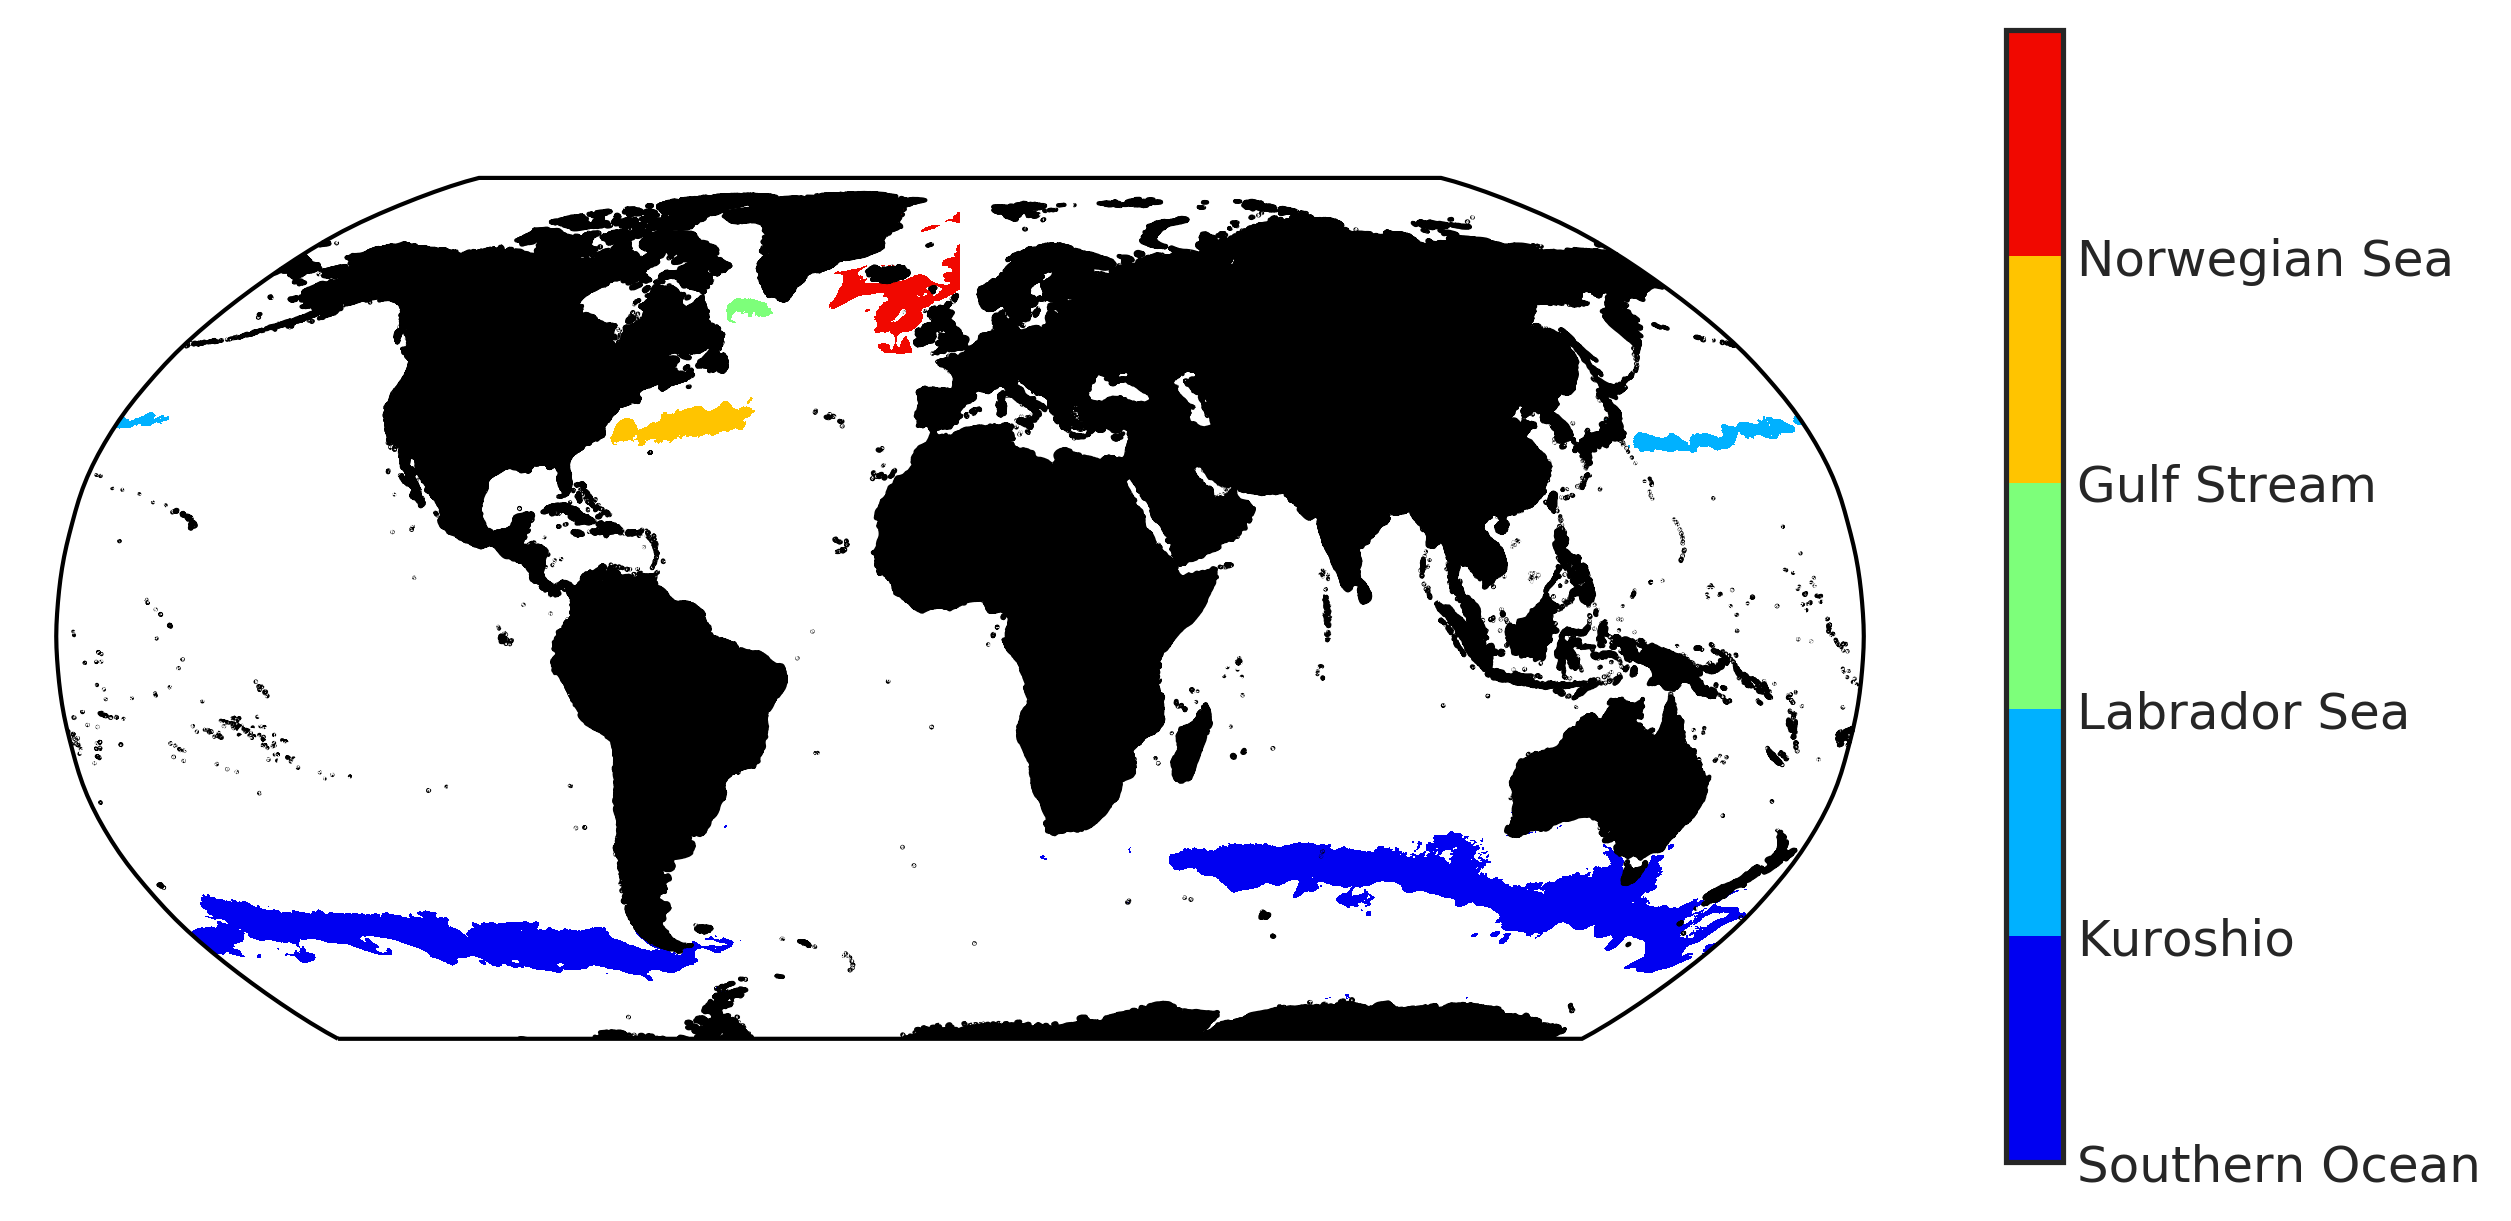

In [11]:
# regrid to make map plot:
plt.figure(figsize=(10,5))

ax = plt.subplot(111, projection=ccrs.Robinson(central_longitude=0))
mm = ax.contourf(lon,lat,np.ma.masked_equal(mask_all,0),np.arange(0,6,1),transform=ccrs.PlateCarree(),cmap='jet')
ax.coastlines(resolution='10m');
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','10m',edgecolor='none',\
                                            facecolor='k'))
cbar = plt.colorbar(mm,ax=ax)
cbar.ax.set_yticklabels(['Southern Ocean','Kuroshio','Labrador Sea','Gulf Stream','Norwegian Sea'])


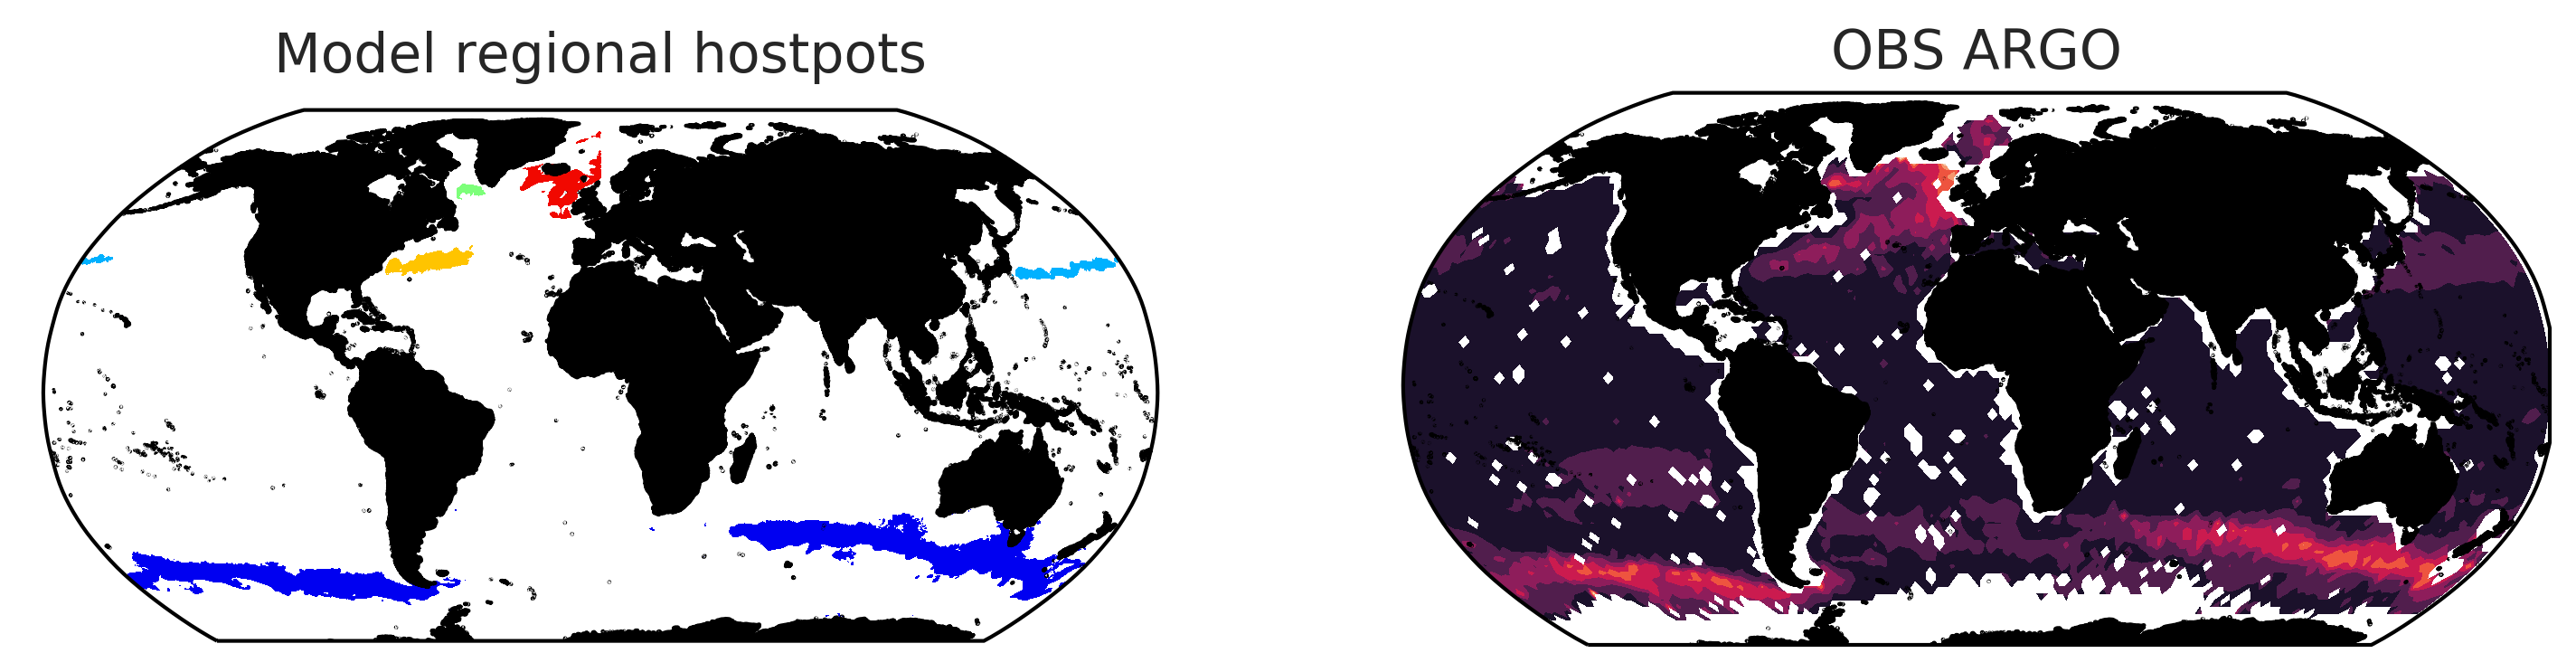

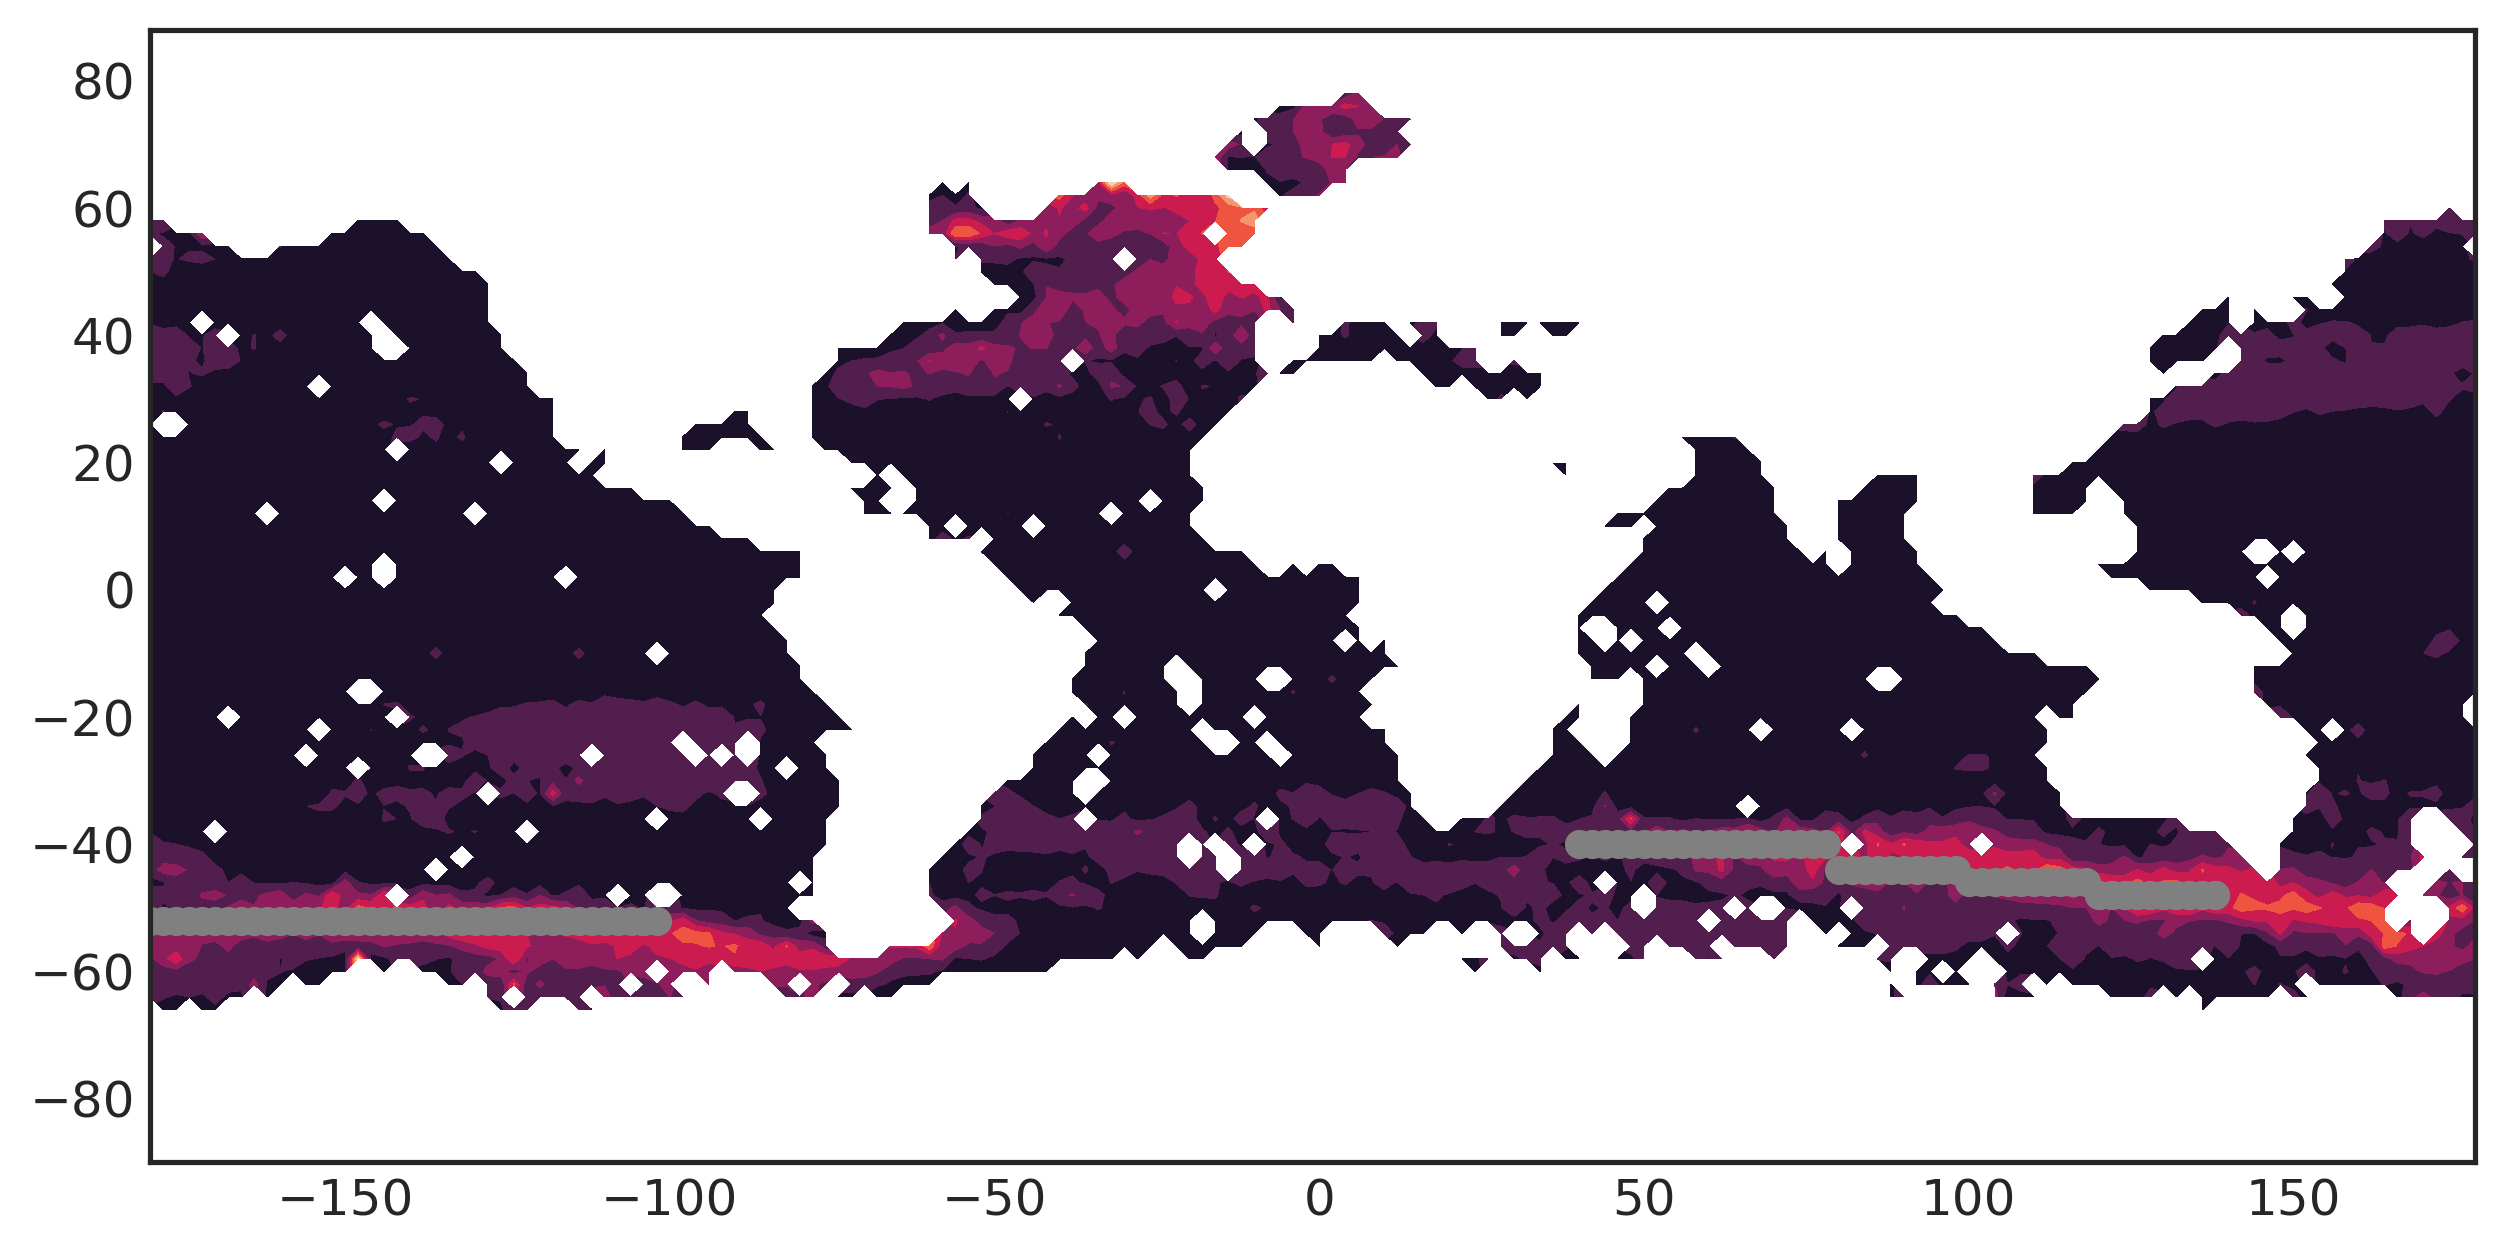

In [165]:
# regrid to make map plot:
plt.figure(figsize=(12,5))

ax = plt.subplot(121, projection=ccrs.Robinson(central_longitude=0))
mm = ax.contourf(lon,lat,np.ma.masked_equal(mask_all,0),np.arange(0,6,1),transform=ccrs.PlateCarree(),cmap='jet')
ax.coastlines(resolution='10m');
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','10m',edgecolor='none',\
                                            facecolor='k'))
plt.title('Model regional hostpots')
ax = plt.subplot(122, projection=ccrs.Robinson(central_longitude=0))
mm = ax.contourf(lon_o,lat_o,np.max(mld_o,2),transform=ccrs.PlateCarree())

ax.coastlines(resolution='10m');
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','10m',edgecolor='none',\
                                            facecolor='k'))
plt.title('OBS ARGO')
plt.figure()
ax = plt.subplot(111)
ax.contourf(lon_o,lat_o,np.max(mld_o,2))
plt.plot(lon_o[19,0:40],lat_o[19,0:40],'o',color='grey')
plt.plot(lon_o[25,110:130],lat_o[25,110:130],'o',color='grey')
plt.plot(lon_o[23,130:140],lat_o[23,130:140],'o',color='grey')
plt.plot(lon_o[22,140:150],lat_o[22,140:150],'o',color='grey')
plt.plot(lon_o[21,150:160],lat_o[21,150:160],'o',color='grey')

plt.plot(lon_o[21,150:160],lat_o[21,150:160],'o',color='grey')
so_mld_o = np.concatenate((mld_o[19,0:20,:],mld_o[25,110:130,:], mld_o[23,130:140,:],mld_o[22,140:150,:],mld_o[21,150:160]))
plt.title('')

In [ ]:
# SO: 
so_mld_o = np.concatenate((mld_o[19,0:20,:],mld_o[25,110:130,:], mld_o[23,130:140,:],mld_o[22,140:150,:],mld_o[21,150:160]))
#lab sea
plt.plot(np.nanmean(mld_o[73:74,62:64,:],axis=tuple((0,1))))
#gulf
plt.plot(np.nanmean(mld_o[59:64,55:63],axis=tuple((0,1))))
#North sea
plt.plot(np.nanmean(mld_o[68:77,77:85],axis=tuple((0,1))))
#KC:
plt.plot(np.nanmean(mld_o[58:66,155:176],axis=tuple((0,1))))

# SAVE NETCDF

In [9]:
la,lo = np.shape(mask_so)
#nc.close()
from netCDF4 import Dataset
root_grp = Dataset('regional_mask_all1.nc', 'w', format='NETCDF4')
root_grp.description = 'Masks of regional hostspots in top 5\% of annual max MLD'
root_grp.createDimension('lon', lo)
root_grp.createDimension('lat', la)

# variables
mask_alls = root_grp.createVariable('mask_hotspots','f8' ,dimensions=('lat','lon'),fill_value=9.969209968386869e+36)
# data
root_grp.variables['mask_hotspots'][:] = mask_all
root_grp.close()  # close the new file

#mask_alls[:] = mask_all

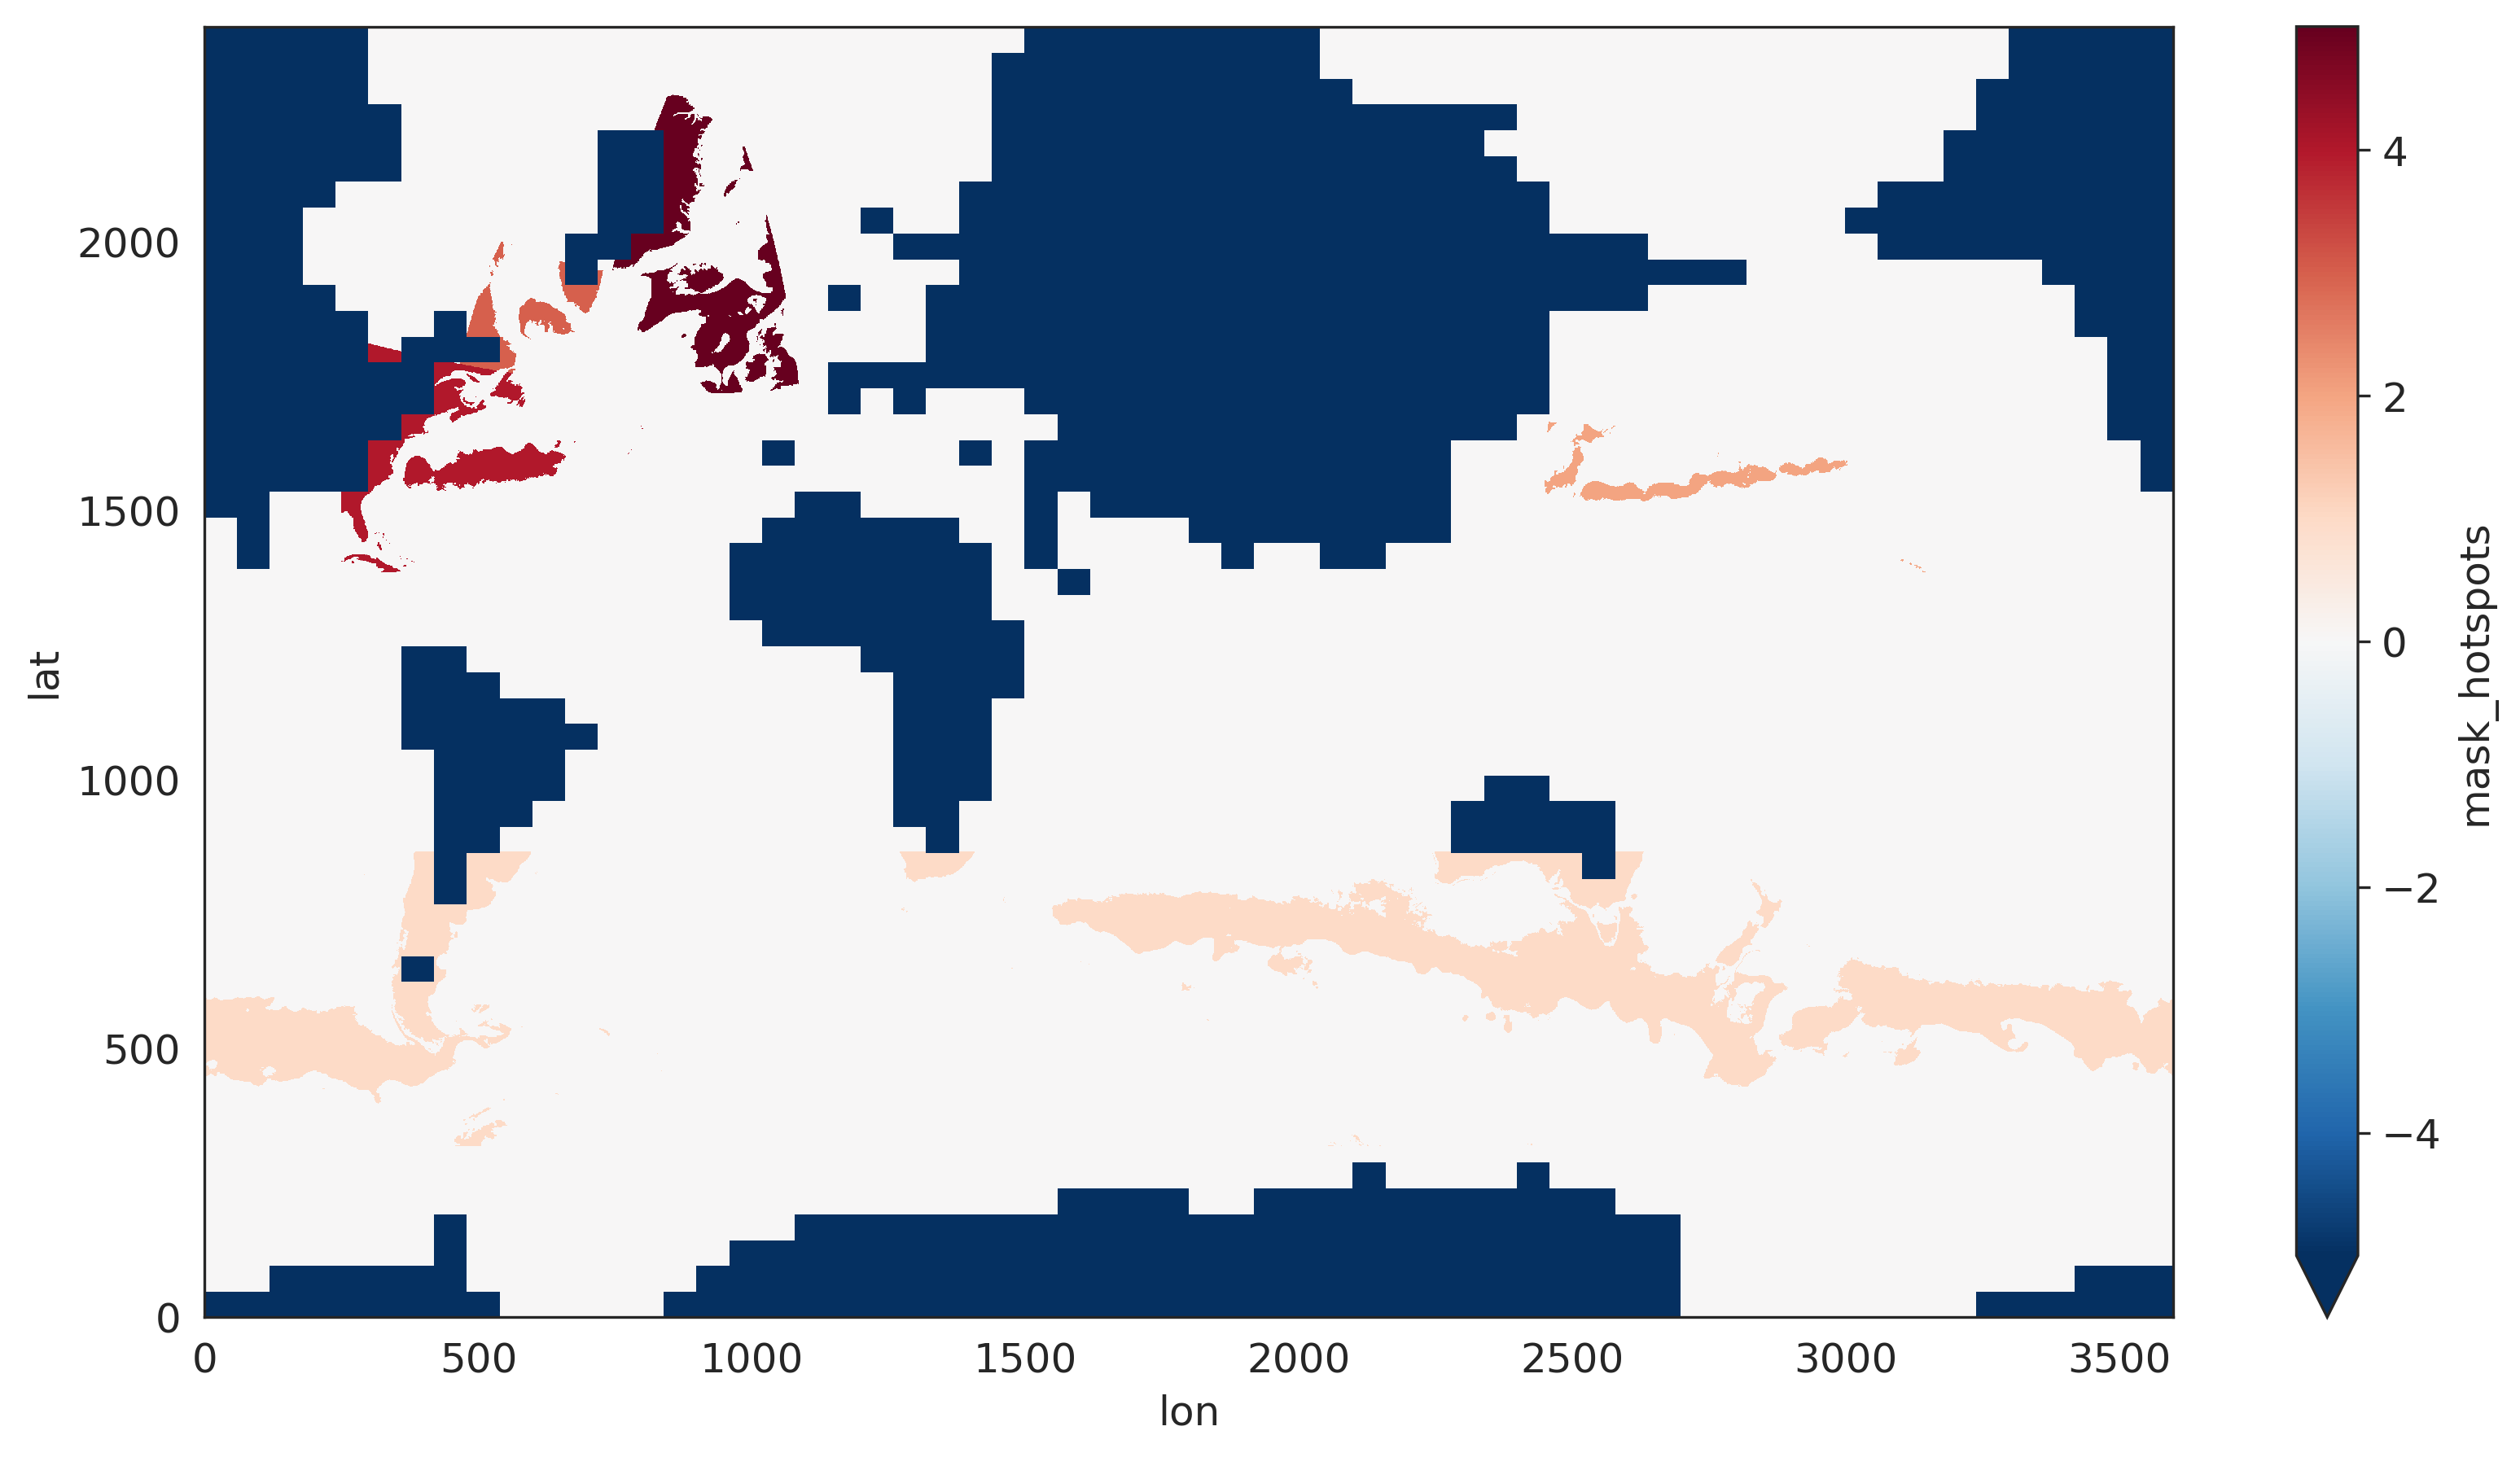

In [10]:
# Test NETCDF SAVED
test = xr.open_mfdataset('regional_mask_all1.nc', decode_times=False,)
test.mask_hotspots.plot(vmax=5)

# MASK MONTHLY MEANS and PLOT: 


/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning: Mean of empty slice
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:32: RuntimeWarning: Mean of empty slice
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:33: RuntimeWarning: Mean of empty slice
/home/snicholson1/.conda/envs/seaPy/lib/python3.6/site-packages/ipykernel/__main__.py:34: RuntimeWarning: Mean of empty slice


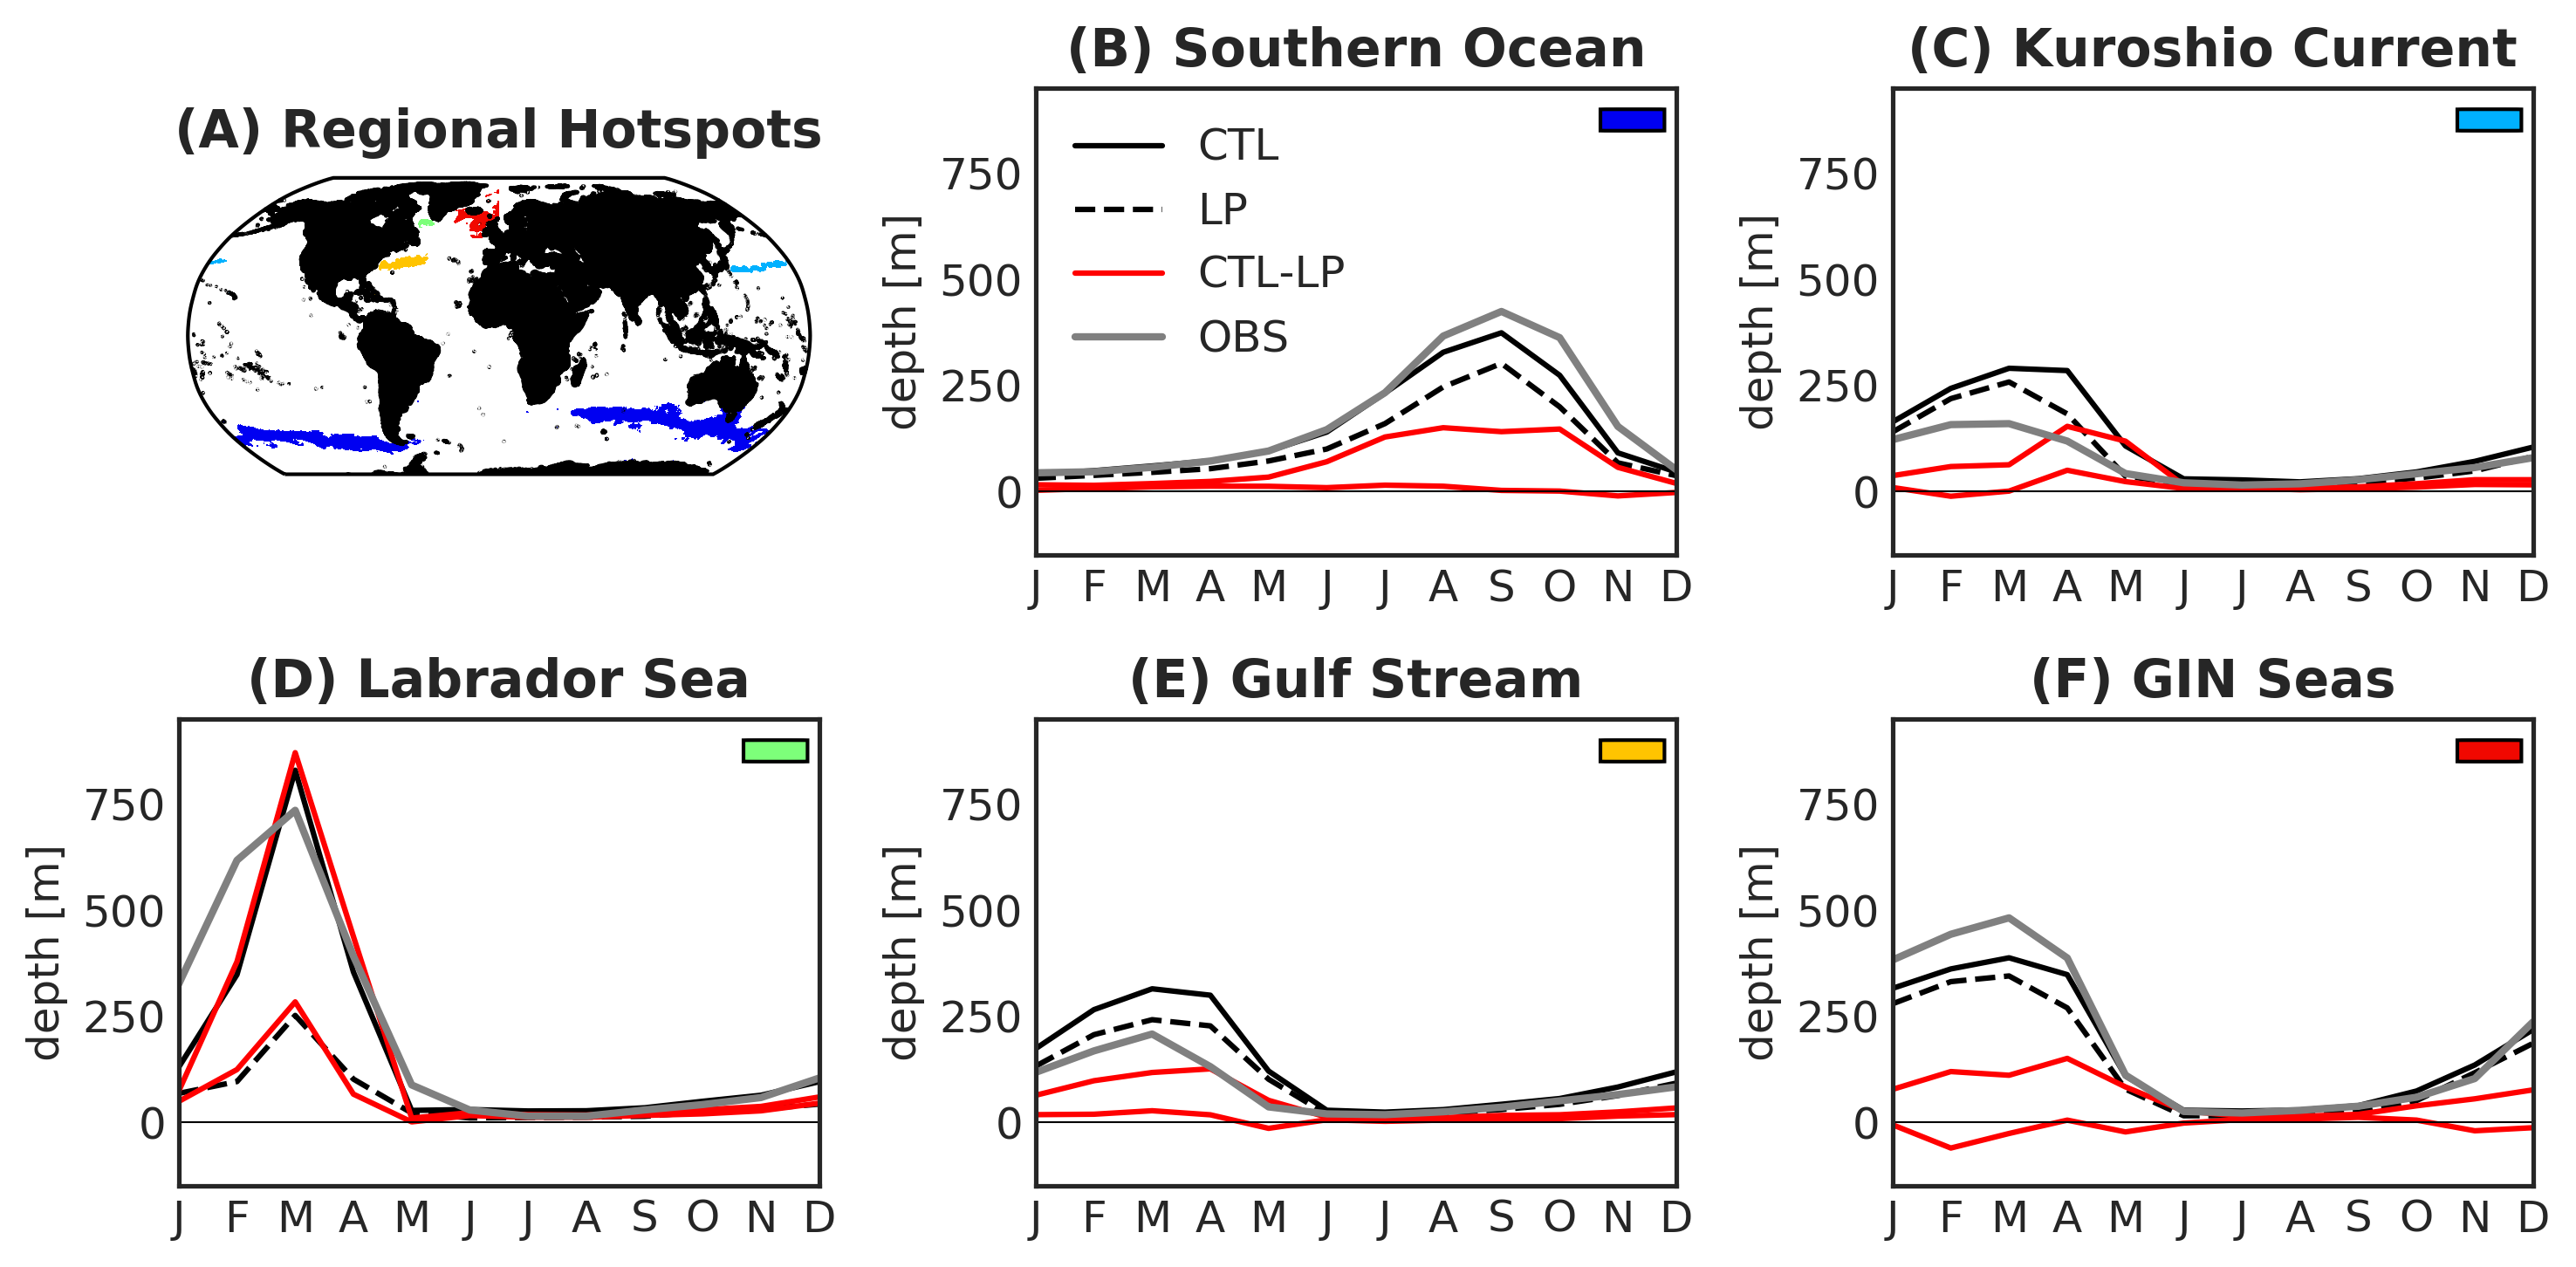

In [164]:
plt.figure(figsize(10,5))

# plot map
ax = plt.subplot(231, projection=ccrs.Robinson(central_longitude=0))
mm = ax.contourf(lon,lat,np.ma.masked_equal(mask_all,0),np.arange(0,6,1),transform=ccrs.PlateCarree(),cmap='jet')
ax.coastlines(resolution='10m');
ax.add_feature(cartopy.feature.NaturalEarthFeature('physical','land','110m',edgecolor='none',\
                                    facecolor='k'))
#cbar = plt.colorbar(mm,ax=ax)
#cbar.ax.set_yticklabels(['SO','KC','LS','GS','NS'])
#cbar.ax.set_yticklabels(['Southern Ocean','Kuroshio','Labrador Sea','Gulf Stream','Norwegian Sea'])
plt.title('(A) Regional Hotspots',fontweight = 'bold')


test = np.arange(12)
test_lp = np.arange(12)
vari = ['mask_so','mask_kc','mask_lab','mask_gc','mask_ns']
titls = ['(B) Southern Ocean','(C) Kuroshio Current','(D) Labrador Sea', '(E) Gulf Stream','(F) GIN Seas']
month = np.arange(0,12,1)
vari = ['mask_so','mask_kc','mask_lab','mask_gc','mask_ns']
k=1
k=1

c = [.1,.3,.5,.7,.9]
for ii in range(size(vari )):
    region = eval(vari[ii])
    test=np.zeros(12)
    test_lp=np.zeros(12)
    test_lp_diff=np.zeros(12)
    test_lp_diffstd=np.zeros(12)
    for i in range(12):
        test[i] = np.nanmean(np.ma.array(np.nanmean(mld[i:(49+i):12,::],0), mask = (region==False)),axis=tuple((0,1)))
        test_lp[i] = np.nanmean(np.ma.array(np.nanmean(mld_lp[i:(49+i):12,::],0), mask = (region==False)),axis=tuple((0,1)))
        test_lp_diff[i]= np.nanmean(np.ma.array(np.nanmean(mld[i:(49+i):12,::]-mld_lp[i:(49+i):12,::],0), mask = (region==False)),axis=tuple((0,1)))
        test_lp_diffstd[i]= np.nanstd(np.ma.array(np.nanmean(mld[i:(49+i):12,::]-mld_lp[i:(49+i):12,::],0), mask = (region==False)),axis=tuple((0,1)))

    k=k+1
    if k > 6:
        print('done')
    else:
        ax= plt.subplot(2,3,k)
        plt.plot(month,test,'-k',label='CTL')
        plt.plot(month,test_lp,'--k',label='LP')
        plt.plot(month,test_lp_diff+test_lp_diffstd,'-r',label='CTL-LP')
        plt.plot(month,test_lp_diff-test_lp_diffstd,'-r')
    
    # plot obs:
    # Lab sea
    if ii ==2:
        plt.plot(np.ma.mean(mld_o[73:74,62:64,:],axis=tuple((0,1))),color='grey',lw=2)
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['J','F','M','A','M','J','J','A','S','O','N','D'])
        plt.xlim(0,12)

    if ii==0:
        so_mld_o = np.concatenate((mld_o[19,0:30,:],mld_o[25,110:130,:], mld_o[23,130:140,:],mld_o[22,140:150,:]))
        plt.plot(month,np.mean(so_mld_o,0),'-',color='grey',lw=2,label='OBS')
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['J','F','M','A','M','J','J','A','S','O','N','D'])
        plt.xlim(0,12)
        plt.legend()
        
    if ii==1:
        #KC:
        plt.plot(month,np.nanmean(mld_o[58:66,155:176],axis=tuple((0,1))),color='grey',lw=2)
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['J','F','M','A','M','J','J','A','S','O','N','D'])
        plt.xlim(0,12)
        
    if ii ==3:#gulf
        plt.plot(month,np.nanmean(mld_o[59:64,55:63],axis=tuple((0,1))),color='grey',lw=2)
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['J','F','M','A','M','J','J','A','S','O','N','D'])
        plt.xlim(0,12)
    
    if ii==4:#North sea
        plt.plot(month,np.nanmean(mld_o[68:77,77:85],axis=tuple((0,1))),color='grey',lw=2)
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['J','F','M','A','M','J','J','A','S','O','N','D'])
        plt.xlim(0,11)
        plt.title(titls[ii],fontweight = 'bold')
        #ax.add_patch(pat)
        #pat = mpatches.FancyBboxPatch((10,850),0.5,50,facecolor=cm.jet(c[ii]))
        plt.ylabel('depth [m]')  
        plt.ylim(-150,950)
        
    if (ii==0)|(ii==1) |(ii==2) |(ii==3) | (ii==4):
        plt.ylim(-150,950)
        plt.plot(month,np.zeros(12),'-k',lw=.5)
        plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11],['J','F','M','A','M','J','J','A','S','O','N','D'])
        plt.xlim(0,11)
        plt.title(titls[ii],fontweight = 'bold')
        pat = mpatches.FancyBboxPatch((10,850),0.5,50,facecolor=cm.jet(c[ii]))
        ax.add_patch(pat)
        plt.ylabel('depth [m]')
        if ii==0:
            plt.legend(loc=0)
        plt.tight_layout()
        
plt.savefig('Figure15_Regional_hotspots_ARGO.png',dpi=300)
plt.savefig('Figure15_Regional_hotspots_ARGO.pdf')
